## CROP PREDICTION SYSTEM

In [14]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
crop=pd.read_csv('Crop_recommendation.csv')

In [18]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Understanding the Data

In [20]:
# this is a classification problem because label is a categorical problem
crop.shape

(2200, 8)

In [24]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [26]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

no value is null

In [31]:
crop.duplicated().sum()

0

In [33]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [47]:
crop_numeric = crop.select_dtypes(include=[float, int])#because only int n float values can have corr
corr = crop_numeric.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


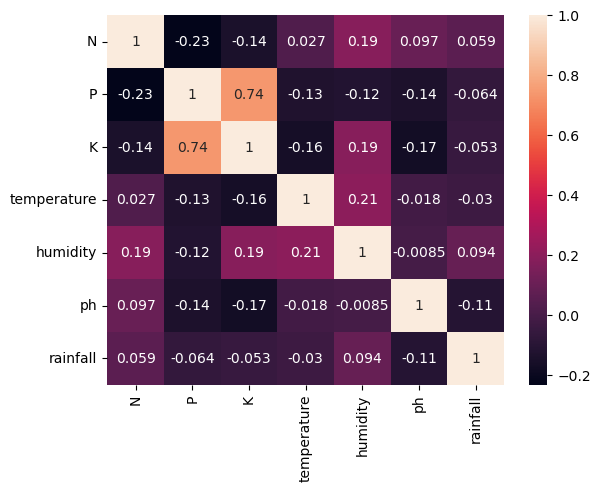

In [55]:
sns.heatmap(corr,annot=True,cbar=True)
plt.show()

In [57]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

C:\Users\Niharika\AppData\Local\Temp\ipykernel_37196\3669751595.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


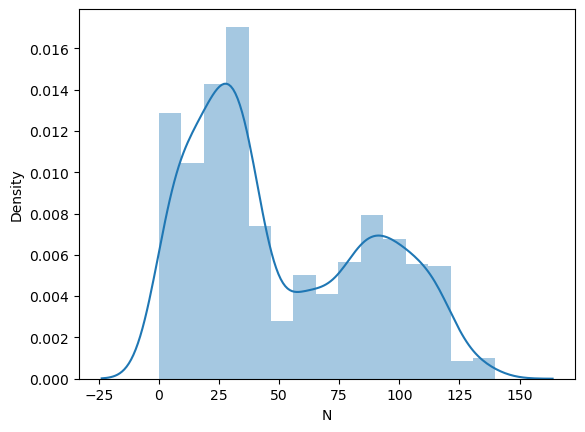

In [67]:
sns.distplot(crop['N'])
plt.show()

# Encoding
To convert categorial variable to numeric value

In [78]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)#to get mapped accoring to label

In [80]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [92]:
crop.drop('label', axis=1, inplace=True)
#axis=1 specifies that you're dropping a column (if you want to drop a row, use axis=0).
#inplace=True makes the operation modify the original DataFrame directly, rather than returning a modified copy.

KeyError: "['label'] not found in axis"

In [94]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [104]:
X=crop.drop('crop_num',axis=1)

In [106]:
Y=crop['crop_num']

In [108]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [110]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

train_test_split(X, Y, test_size=0.2, random_state=42):

X: The input features.

Y: The output labels.


test_size=0.2: This parameter specifies the proportion of the dataset to be used for testing. Here, test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training.
random_state=42: This ensures the splitting of the data is reproducible. Setting a specific random_state (like 42) makes sure that every time you run the code, the data is split in the same way.

In [125]:
X_train.shape

(1760, 7)

In [129]:
X_test.shape

(440, 7)

In [131]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725


# Scale using MinMax Scaler

Transforms the Features in a given Range

In [143]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

ms.fit(X_train)
X_train=ms.transform(X_train)
X_test=ms.transform(X_test)

In [149]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standardization

In [152]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [154]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

# Training Model

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


Now to find which algo works the best

In [176]:
models = {
    'lg': LogisticRegression(),
    'gnb': GaussianNB(),
    'svc': SVC(),
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(),
    'et': ExtraTreeClassifier(),
    'rf': RandomForestClassifier(),
    'bc': BaggingClassifier(),
    'gb': GradientBoostingClassifier(),
    'ab': AdaBoostClassifier()
}


In [178]:
for name,md in models.items():
    md.fit(X_train,y_train)
    ypred=md.predict(X_test)
    print(f"{name} with accuracy : {accuracy_score(y_test,ypred)}")

lg with accuracy : 0.9636363636363636
gnb with accuracy : 0.9954545454545455
svc with accuracy : 0.9681818181818181
knn with accuracy : 0.9590909090909091
dt with accuracy : 0.9886363636363636
et with accuracy : 0.9136363636363637
rf with accuracy : 0.9931818181818182
bc with accuracy : 0.9931818181818182
gb with accuracy : 0.9818181818181818


C:\Users\Niharika\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ab with accuracy : 0.09545454545454546


Choosing RandomForestClassifier

In [183]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred=rfc.predict(X_test)
accuracy_score(y_test,ypred)


0.9931818181818182

# Predictive System

In [202]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features=np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    prediction=rfc.predict(features).reshape(1,-1)# gives signgle row output
    return prediction[0]

In [206]:
{
    1: 'rice',
    2: 'maize',
    3: 'jute',
    4: 'cotton',
    5: 'coconut',
    6: 'papaya',
    7: 'orange',
    8: 'apple',
    9: 'muskmelon',
    10: 'watermelon',
    11: 'grapes',
    12: 'mango',
    13: 'banana',
    14: 'pomegranate',
    15: 'lentil',
    16: 'blackgram',
    17: 'mungbean',
    18: 'mothbeans',
    19: 'pigeonpeas',
    20: 'kidneybeans',
    21: 'chickpea',
    22: 'coffee'
}


{1: 'rice',
 2: 'maize',
 3: 'jute',
 4: 'cotton',
 5: 'coconut',
 6: 'papaya',
 7: 'orange',
 8: 'apple',
 9: 'muskmelon',
 10: 'watermelon',
 11: 'grapes',
 12: 'mango',
 13: 'banana',
 14: 'pomegranate',
 15: 'lentil',
 16: 'blackgram',
 17: 'mungbean',
 18: 'mothbeans',
 19: 'pigeonpeas',
 20: 'kidneybeans',
 21: 'chickpea',
 22: 'coffee'}

In [249]:
N = 40  # Nitrogen
P = 50  # Phosphorus
K = 60  # Potassium
temperature = 30.0  # Temperature (°C)
humidity = 40  # Humidity (%)
ph = 6.5  # pH level of soil
rainfall = 50  # Rainfall (mm)


predict=recommendation(N,P,K,temperature,humidity,ph,rainfall)
predict=int(predict[0])
if predict in crop_dict:
    crop=crop_dict[predict]
    print("{} is the best crop to be cultivated".format(crop))
else:
    print("We are unable to recommend a proper crop for this environment")

apple is the best crop to be cultivated


In [255]:
import pickle

# Directly saving to a valid path
pickle.dump(rfc, open('model.pkl', 'wb'))  # Saving to the current working directory
